![](https://raw.githubusercontent.com/Larxel/Assets/main/monkeypox_splash.png)

In [1]:
import re
import time
import numpy as np
import pandas as pd

from datetime import datetime, timedelta

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go


!pip install country_converter -q
import country_converter as coco

today = datetime.today()
day   = today.day if today.day > 9 else '0' + str(today.day)
month = today.month if today.month > 9 else '0' + str(today.month)
today_str = '{}/{}/{}'.format(day, month, today.year)

# Fetch data
monkeypox_df = pd.read_csv("https://raw.githubusercontent.com/globaldothealth/monkeypox/main/latest.csv")

# Preprocess data
monkeypox_df['Location'] = monkeypox_df['Location_information'].apply(lambda x: re.sub(r' \((.+?)$','',x))
monkeypox_df['Location'] = monkeypox_df['Location'].apply(lambda x: re.sub(r'(.+?), United States','United States',x))
monkeypox_df['County'] = [x.split(', ')[0] if len(x.split(', ')) > 1 else None for x in monkeypox_df['Location_information']]

# Export to disk
monkeypox_df.to_csv('monkeypox_df.csv', index = False)

# Cases by country
country_cases_df = monkeypox_df.loc[monkeypox_df['Case_status'] == 'confirmed',['_id','Location']].groupby('Location').agg('count').reset_index().rename({'_id':'Count'}, axis = 1)
country_cases_df.to_csv('monkeypox_cases_by_country.csv', index = False)

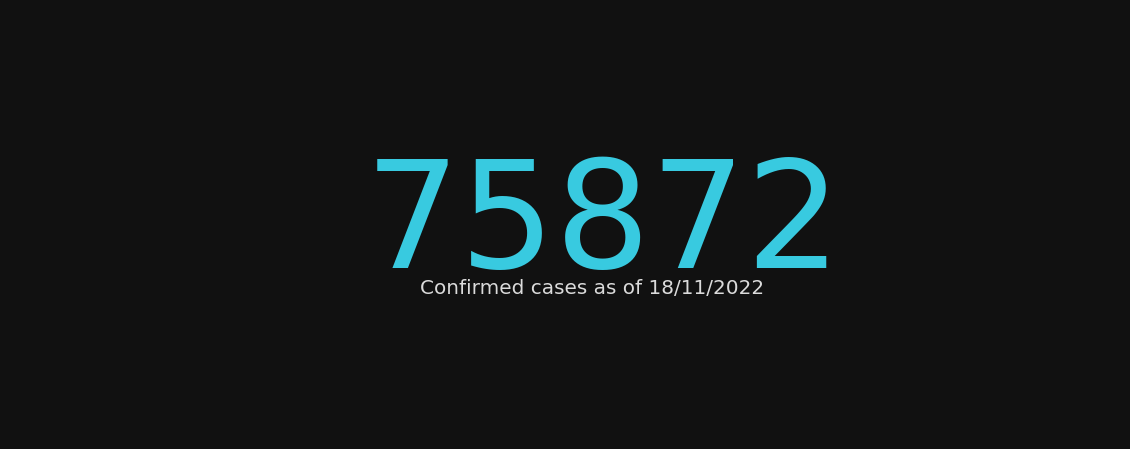

In [2]:
num_confirmed_cases = monkeypox_df.loc[monkeypox_df['Case_status'] == 'confirmed'].shape[0]


fig = plt.figure(figsize = (20,8))
fig.patch.set_facecolor('#111111')

plt.text(x = 0.32,
         y = 0.4,
         s = str(num_confirmed_cases),
         multialignment = 'center',
         fontsize = 150,
         color = '#38cae0'
        )

plt.text(x = 0.37,
         y = 0.34,
         s = 'Confirmed cases as of {}'.format(today_str),fontsize = 20,
         multialignment = 'center',
         color = '#dbdbdb'
        )

plt.axis('off')
plt.show()

In [3]:
filtered_df = monkeypox_df.loc[monkeypox_df['Case_status'] == 'confirmed']
map_df = filtered_df[['Location','_id']].groupby('Location').agg('count').reset_index()
map_df['CountryCode'] = coco.convert(names = map_df['Location'], to = 'ISO3')
map_df.rename({'_id':'Count of Confirmed Cases'}, axis = 1, inplace = True)


fig = px.choropleth(map_df,
                    locations = "CountryCode",
                    color = "Count of Confirmed Cases",
                    hover_name = "Location",
                    color_continuous_scale = ["#d7e1ee", "#cbd6e4", "#bfcbdb", "#b3bfd1", "#a4a2a8", "#df8879", "#c86558", "#b04238", "#991f17"],
                    projection = 'natural earth',
                    template = 'plotly_dark',
                    title = 'Geographical Distribution of Confirmed Cases<br><sub>Natural Projection</sub>',
                    height = 800,
                    width = 1120,
                   )

fig.update_geos(lataxis_showgrid = True,
                lonaxis_showgrid = True,
                showcountries = True,
               )

fig.update_geos(lataxis = {'gridcolor':'#222222'},
                lonaxis = {'gridcolor':'#222222'},
               )

fig.show()

In [4]:
fig = px.choropleth(map_df,
                    locations = "CountryCode",
                    color = "Count of Confirmed Cases",
                    hover_name = "Location",
                    color_continuous_scale = ["#d7e1ee", "#cbd6e4", "#bfcbdb", "#b3bfd1", "#a4a2a8", "#df8879", "#c86558", "#b04238", "#991f17"],
                    projection = 'orthographic',
                    template = 'plotly_dark',
                    title = 'Geographical Distribution of Confirmed Cases<br><sub>Orthographic Projection</sub>',
                    height = 800,
                    width = 1120,
                   )

fig.update_geos(lataxis_showgrid = True,
                lonaxis_showgrid = True,
                showcountries = True,
               )

fig.update_geos(lataxis = {'gridcolor':'#222222'},
                lonaxis = {'gridcolor':'#222222'},
               )

fig.show()

In [5]:
fig = px.choropleth(map_df,
                    locations = "CountryCode",
                    color = "Count of Confirmed Cases",
                    hover_name = "Location",
                    scope = 'europe',
                    color_continuous_scale = ["#d7e1ee", "#cbd6e4", "#bfcbdb", "#b3bfd1", "#a4a2a8", "#df8879", "#c86558", "#b04238", "#991f17"],
                    template = 'plotly_dark',
                    title = 'European Distribution of Confirmed Monkeypox Cases<br><sub>Orthographic Projection</sub>',
                    height = 800,
                    width = 1120,
                   )

fig.update_geos(lataxis_showgrid = True,
                lonaxis_showgrid = True,
                showcountries = True,
                showsubunits = True,
               )

fig.update_geos(lataxis = {'gridcolor':'#222222'},
                lonaxis = {'gridcolor':'#222222'},
               )

fig.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#111111;
           font-size:110%;
           font-family:Roboto;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">       On september 23rd, the source of the dataset changed its means of aquisition, causing profund changes in the available data. The next charts depict data before these change took effect. 
    
</p>
</div>

In [6]:
monkeypox_deprecated_df = pd.read_csv("https://raw.githubusercontent.com/globaldothealth/monkeypox/main/latest_deprecated.csv")
acumulated_df = monkeypox_deprecated_df[['Date_confirmation','ID']].groupby('Date_confirmation').agg('count').reset_index()
acumulated_df['Accumulated Cases'] = acumulated_df['ID'].cumsum()
acumulated_df.rename({'ID':'Count'}, axis = 1, inplace = True)

# Last date of update before being deprecated
acumulated_df['Date_confirmation'][-1:] = '2022-09-23'

fig = px.line(acumulated_df,
              x = 'Date_confirmation',
              y = 'Accumulated Cases',
              markers = True,
              title = 'Global Accumulated Number of Confirmed Monkeypox Cases<br><sub>As of {}</sub>'.format('23/09/2022'),
              template = 'plotly_dark',
             )

fig['data'][0]['line']['color'] = '#38cae0'
fig['data'][0]['line']['width'] = 2

fig.update_xaxes(title = 'Date of Confirmation')
fig.show()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning:

Columns (3,8,10,11,12,14,16,18,19,20,21,22,23,24,25,29) have mixed types.Specify dtype option on import or set low_memory=False.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
fig = px.bar(acumulated_df,
             x = 'Date_confirmation',
             y = 'Count',
             text = 'Count',
             color = 'Count',
             opacity = 0.9,
             title = 'Number of Confirmed Cases by Date<br><sup>Up until 23/09/2022',
             color_continuous_scale = ['#bbbbbb','#38cae0'],
             template = 'plotly_dark',
             hover_data = ['Count'],
             color_continuous_midpoint = 0,
             height = 600,
            )

avg_returns = acumulated_df['Count'].mean()
avg_returns_color = '#bbbbbb'


fig.add_hline(y = avg_returns,
              line_width = 1.,
              line_dash = "dot",
              opacity = 0.7,
              fillcolor = avg_returns_color,
              annotation_text = "Average: " + str(round(avg_returns,1)) + ' cases per day', 
              annotation_position = "bottom right",
              annotation_font_size = 10,
              annotation_font_color = "white",
              line_color = avg_returns_color,
             )

fig.update_xaxes(showticklabels = True,
                 dtick = "M1",
                 tickformat = "%b %Y",
                )

fig.update_yaxes(title = 'Confirmed Cases')
fig.update_xaxes(title = 'Date')

fig.show()

In [8]:
temp_df = pd.DataFrame(monkeypox_deprecated_df['Hospitalised (Y/N/NA)'].value_counts()).reset_index()
n = temp_df['Hospitalised (Y/N/NA)'].sum()
n_total = monkeypox_deprecated_df.shape[0]
temp_df['index'] = np.where(temp_df['index'] == 'Y','Yes','No')


fig = go.Figure(data=[go.Pie(labels = temp_df['index'],
                             values = temp_df['Hospitalised (Y/N/NA)'],
                             hole = .75,
                             marker_colors = ["#a60c0c","#222222"],
                            )
                     ])



fig.update_layout(
    title_text = "Was the patient Hospitalized?<br><sub>Calculated on a sample of {} out of {} observations in the deprecated dataset - data up until 23/09/2022".format(n, n_total),
    template = 'plotly_dark',
    height = 600,
    annotations = [dict(text = 'Hospitalization',
                      x = 0.5,
                      y = 0.5,
                      font_size = 20,
                      showarrow = False,
                     )])



fig.show()

In [9]:
rename_dict = {'RT-PCR':'RT-PCR',
               'PCR':'PCR',
               'Electron microscopy':'Electron microscopy',
               'Sequencing':'Sequencing',
               'Microbiological Test':'Microbiological test',
               '"Molecular and gene sequencing"':'Sequencing',
               'PCR and sequencing':'PCR',
               'qPCR or RT-PCR':'PCR',
               'confirmed positive for Monkeypox via Reverse Transcriptase Polymerase Chain Reaction or RT-PCR by the DOH Research Institute for Tropical Medicine (RITM) on August 18, 2022':'RT-PCR',
               'confirmed positive for Monkeypox via RT-PCR by the DOH RITM on August 19, 2022':'RT-PCR',
              }

monkeypox_deprecated_df['Confirmation_method'] = monkeypox_deprecated_df['Confirmation_method'].apply(lambda x: rename_dict.get(x))

temp_df = pd.DataFrame(monkeypox_deprecated_df['Confirmation_method'].value_counts()).reset_index()
n = temp_df['Confirmation_method'].sum()
n_total = monkeypox_deprecated_df.shape[0]

fig = go.Figure(data = [go.Pie(labels = temp_df['index'],
                             values = temp_df['Confirmation_method'],
                             hole = .75,
                             marker_colors = px.colors.sequential.Emrld_r,
                            )
                     ])



fig.update_layout(
    title_text = "Method Used to Confirm or Discart Case<br><sub>Calculated on a sample of {} out of {} observations in the deprecated dataset - data up until 23/09/2022".format(n, n_total),
    template = 'plotly_dark',
    height = 600,
    annotations = [dict(text = 'Confirmation Method',
                      x = 0.5,
                      y = 0.5,
                      font_size = 20,
                      showarrow = False,
                     )])



fig.show()

In [10]:
filtered_deprecated_df = monkeypox_deprecated_df.loc[monkeypox_deprecated_df['Status'] == 'confirmed']
filtered_deprecated_df['Gender'] = filtered_deprecated_df['Gender'].str.capitalize().str.strip()
temp_df = filtered_deprecated_df[['Gender','ID']].groupby('Gender').agg('count').reset_index()
temp_df.rename({'ID':'Count'}, axis = 1, inplace = True)
temp_df['Percentage'] = (temp_df['Count']/temp_df['Count'].sum() * 100).round(2)
temp_df['Percentage'] = temp_df['Percentage'].astype('str') + '%'
n = temp_df['Count'].sum()

fig = px.bar(temp_df,
             y = 'Gender',
             x = 'Count',
             title = 'Distribution of Sex Among Confirmed Cases<br><sub>Calculated on a sample of {} out of {} observations in the deprecated dataset - data up until 23/09/2022</sub>'.format(n,n_total),
             color = 'Gender',
             text = 'Percentage',
             template = 'plotly_dark',
             opacity = 0.8,
             height = 800,
             color_discrete_sequence = ['#dbdbdb','#38cae0']
            )


fig.update_yaxes(title = 'Count of Occurences')
fig.update_xaxes(title = 'Sex')

fig.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
temp_df = pd.DataFrame(monkeypox_deprecated_df['Symptoms'].value_counts()).reset_index()
temp_df = temp_df.append(pd.DataFrame({'index':'multiple or other', 'Symptoms':temp_df.loc[temp_df['Symptoms'] < 5]['Symptoms'].sum()},index = [0]))
temp_df = temp_df.loc[temp_df['Symptoms'] > 4]


fig = go.Figure(data = [go.Pie(labels = temp_df['index'],
                               values = temp_df['Symptoms'],
                               hole = .75,
                               #title = '% of Symptons',
                               marker_colors = px.colors.sequential.algae_r,
                              )
                       ])



fig.update_layout(
    title_text = "Distribution of Symptoms<br><sub>Calculated on a sample in the deprecated dataset - data up until 23/09/2022",
    template = 'plotly_dark',
    height = 600,
    annotations = [dict(text = 'Symptoms',
                      x = 0.5,
                      y = 0.5,
                      font_size = 20,
                      showarrow = False
                     )])



fig.show()

In [12]:
# Create dataframe counting NaN values per column
nan_df = pd.DataFrame(monkeypox_df.isna().sum()).reset_index()
nan_df.columns  = ['Column', 'NaN_Count']
nan_df['NaN_Count'] = nan_df['NaN_Count'].astype('int')
nan_df['NaN_%'] = round(nan_df['NaN_Count']/monkeypox_df.shape[0] * 100,1)
nan_df['Type']  = 'Missingness'
nan_df.sort_values('NaN_%', inplace = True)

# Add completeness
for i in range(nan_df.shape[0]):
    complete_df = pd.DataFrame([nan_df.loc[i,'Column'],monkeypox_df.shape[0] - nan_df.loc[i,'NaN_Count'],100 - nan_df.loc[i,'NaN_%'], 'Completeness']).T
    complete_df.columns  = ['Column','NaN_Count','NaN_%','Type']
    complete_df['NaN_%'] = complete_df['NaN_%'].astype('int')
    complete_df['NaN_Count'] = complete_df['NaN_Count'].astype('int')
    nan_df = nan_df.append(complete_df, sort = True)
    

# Missingness Plot
fig = px.bar(nan_df,
             x = 'Column',
             y = 'NaN_%',
             title = 'Missingness within this Dataset',
             color = 'Type',
             template = 'plotly_dark',
             opacity = 0.6,
             height = 800,
             color_discrete_sequence = ['#dbdbdb','#38cae0']
            )


fig.update_yaxes(title = 'Percentage of NaNs')
fig.update_xaxes(title = 'Column Name')

fig.show()

In case you found this dataset and analysis sueful, you might be intered in a related dataset:

 <font size="+1">Monkeypox Scientific Literature</font>


<a href="https://www.kaggle.com/datasets/andrewmvd/monkeypox-scientific-literature">
<img src="https://github.com/Larxel/Assets/blob/main/monkeypox__abstractsbutton.png?raw=true" alt="Monkeypox Scientific Literature" style="float:left" >
</a>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#38cae0;
           font-size:110%;
           font-family:Roboto;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">       For more resources on monkeypox, please refer to the WHO website for trustworthy information.
    
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#111111;
           font-size:110%;
           font-family:Roboto;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">       Thank you for reading.
    
</p>
</div>


